In [1]:
import geopandas
import numpy as np
import pandas as pd

In [2]:
all_DA_gdf = geopandas.read_file("./data/lda_000b16a_e.shp")
toronto_DA_df = pd.read_csv("./data/DA_income_new.csv")[['COL0','MedianIncome']]

In [3]:
all_DA_gdf.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada
- bounds: (-141.01, 40.04, -47.74, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
#all_DA_gdf.crs = {'init' :'epsg:4326'}

In [5]:
all_DA_gdf.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada
- bounds: (-141.01, 40.04, -47.74, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
np.shape(all_DA_gdf)

(56589, 23)

In [7]:
np.shape(toronto_DA_df)

(3703, 2)

In [8]:
all_DA_gdf['geometry'].head()

0    POLYGON ((8976851.149 2149576.543, 8976818.149...
1    POLYGON ((8977202.180 2150836.794, 8977136.277...
2    POLYGON ((8977549.383 2150892.566, 8977492.269...
3    POLYGON ((8977682.314 2151083.183, 8977689.440...
4    POLYGON ((8978152.474 2151142.586, 8978040.654...
Name: geometry, dtype: geometry

In [9]:
#Filter out non-Toronto DAs, CSDUID = Col0
toronto_DA_values = toronto_DA_df['COL0'].tolist()
print(toronto_DA_values)

[3520, 35200002, 35200003, 35200004, 35200005, 35200006, 35200007, 35200009, 35200010, 35200012, 35200013, 35200018, 35200028, 35200029, 35200030, 35200031, 35200032, 35200033, 35200034, 35200035, 35200036, 35200037, 35200039, 35200041, 35200042, 35200043, 35200044, 35200046, 35200047, 35200048, 35200049, 35200050, 35200051, 35200052, 35200053, 35200054, 35200055, 35200056, 35200057, 35200058, 35200062, 35200064, 35200065, 35200066, 35200067, 35200068, 35200069, 35200070, 35200071, 35200072, 35200073, 35200074, 35200078, 35200079, 35200080, 35200082, 35200085, 35200086, 35200087, 35200088, 35200089, 35200090, 35200091, 35200092, 35200093, 35200094, 35200095, 35200096, 35200097, 35200099, 35200100, 35200101, 35200102, 35200103, 35200104, 35200105, 35200106, 35200107, 35200108, 35200109, 35200110, 35200111, 35200112, 35200114, 35200115, 35200116, 35200117, 35200118, 35200119, 35200120, 35200121, 35200123, 35200124, 35200125, 35200126, 35200127, 35200128, 35200133, 35200134, 35200135, 352

In [10]:
#toronto_DA_gdf= all_DA_gdf[all_DA_gdf['CSDUID'].isin(toronto_DA_values)]
toronto_DA_gdf= all_DA_gdf[all_DA_gdf['CSDNAME']=='Toronto']

In [11]:
np.shape(toronto_DA_gdf)

(3702, 23)

In [12]:
toronto_DA_gdf.head()

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
21501,35201588,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,535,1,535,35535,Toronto,B,5350211.00,0211.00,35200324,"POLYGON ((7212896.883 920397.774, 7212811.303 ..."
21502,35201589,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,535,1,535,35535,Toronto,B,5350211.00,0211.00,35200324,"POLYGON ((7212775.083 920625.880, 7212687.303 ..."
21503,35201590,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,535,1,535,35535,Toronto,B,5350211.00,0211.00,35200324,"POLYGON ((7213168.374 921135.129, 7213291.720 ..."
21504,35201591,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,535,1,535,35535,Toronto,B,5350212.00,0212.00,35200325,"POLYGON ((7213104.223 919396.989, 7213081.400 ..."
21505,35201592,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,535,1,535,35535,Toronto,B,5350211.00,0211.00,35200324,"POLYGON ((7213596.074 920773.111, 7213503.614 ..."


In [13]:
print(min(toronto_DA_gdf['DAUID'].tolist()))

35200002


In [14]:
#Drop lowest value in toronto_df, 3520
toronto_DA_df = toronto_DA_df[toronto_DA_df['COL0'] != 3520]
toronto_DA_df.rename(columns={'COL0':'DAUID'},inplace=True)

In [15]:
np.shape(toronto_DA_df)
toronto_DA_gdf['DAUID'] = toronto_DA_gdf['DAUID'].astype(int)

/home/kwanale1/anaconda3/envs/csc2552/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#Add median income
toronto_DA_gdf = toronto_DA_gdf.merge(toronto_DA_df, on='DAUID')
#Add median income quartile
toronto_DA_gdf['MedianIncomeQuintile'] = pd.qcut(toronto_DA_gdf['MedianIncome'], 5)

In [17]:
toronto_DA_gdf.head()
print(toronto_DA_gdf['MedianIncomeQuintile'].unique())

[(27840.0, 33621.0], (33621.0, 45184.0], (45184.0, 113408.0], (11071.999, 23808.0], (23808.0, 27840.0], NaN]
Categories (5, interval[float64]): [(11071.999, 23808.0] < (23808.0, 27840.0] < (27840.0, 33621.0] < (33621.0, 45184.0] < (45184.0, 113408.0]]


In [18]:
stations_df = pd.read_csv("./data/bikeshare_stations.csv")
stations_df.head()

,station_id,name,lat,lon
0,7000.0,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001.0,Lower Jarvis St / The Esplanade,43.647992,-79.370907
2,7002.0,St. George St / Bloor St W,43.667333,-79.399429
3,7003.0,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004.0,University Ave / Elm St,43.656518,-79.389099


In [19]:
stations_gdf = geopandas.GeoDataFrame(stations_df,crs='EPSG:4326', geometry=geopandas.points_from_xy(stations_df.lon, stations_df.lat))
#stations_gdf.crs = {'init' :'EPSG:4326'}
stations_gdf = stations_gdf.to_crs("EPSG:3347")
toronto_DA_gdf = toronto_DA_gdf.to_crs("EPSG:3347")

In [20]:
import pyproj
pyproj.Proj("+init=epsg:4326")

/home/kwanale1/anaconda3/envs/csc2552/lib/python3.7/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


Proj('+proj=longlat +datum=WGS84 +no_defs', preserve_units=True)

In [21]:
print(type(stations_gdf))
print(stations_gdf.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:3347


In [22]:
stations_gdf.head()

,station_id,name,lat,lon,geometry
0,7000.0,Fort York Blvd / Capreol Ct,43.639832,-79.395954,POINT (7224080.275 927001.572)
1,7001.0,Lower Jarvis St / The Esplanade,43.647992,-79.370907,POINT (7225929.347 928315.969)
2,7002.0,St. George St / Bloor St W,43.667333,-79.399429,POINT (7223189.109 930015.129)
3,7003.0,Madison Ave / Bloor St W,43.667158,-79.402761,POINT (7222923.037 929942.005)
4,7004.0,University Ave / Elm St,43.656518,-79.389099,POINT (7224265.860 928974.351)


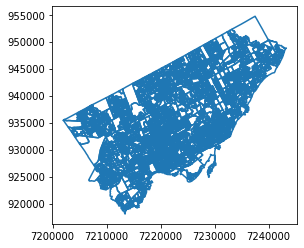

In [23]:
toronto_DA_gdf.boundary.plot()

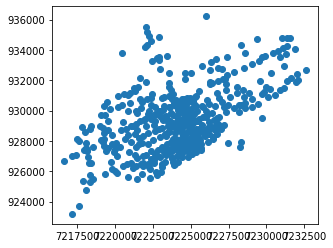

In [24]:
stations_gdf.plot()

In [25]:
#stations_gdf.crs = {'init' :'epsg:3347'}

In [26]:
print(type(toronto_DA_gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [27]:
stations_gdf['geometry'] = stations_gdf['geometry'].buffer(500)

In [28]:
stations_gdf.head()

,station_id,name,lat,lon,geometry
0,7000.0,Fort York Blvd / Capreol Ct,43.639832,-79.395954,"POLYGON ((7224580.275 927001.572, 7224577.867 ..."
1,7001.0,Lower Jarvis St / The Esplanade,43.647992,-79.370907,"POLYGON ((7226429.347 928315.969, 7226426.939 ..."
2,7002.0,St. George St / Bloor St W,43.667333,-79.399429,"POLYGON ((7223689.109 930015.129, 7223686.701 ..."
3,7003.0,Madison Ave / Bloor St W,43.667158,-79.402761,"POLYGON ((7223423.037 929942.005, 7223420.630 ..."
4,7004.0,University Ave / Elm St,43.656518,-79.389099,"POLYGON ((7224765.860 928974.351, 7224763.453 ..."


In [29]:
stations_gdf.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada
- bounds: (-141.01, 40.04, -47.74, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
toronto_DA_gdf.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada
- bounds: (-141.01, 40.04, -47.74, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

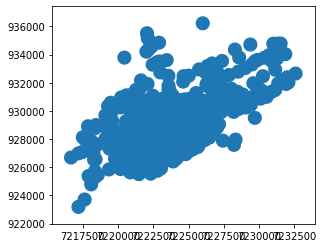

In [31]:
stations_gdf.plot()

In [32]:
print(type(toronto_DA_gdf))
print(type(stations_gdf))
np.shape(toronto_DA_gdf)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


(3702, 25)

In [33]:
#stations_gdf = stations_gdf[stations_gdf.geometry.type == 'POLYGON']
np.shape(stations_gdf)

(463, 5)

In [34]:
res_difference= geopandas.overlay(toronto_DA_gdf,stations_gdf,how='difference')

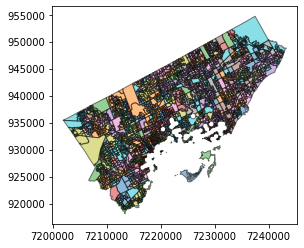

In [35]:
res_difference.plot(alpha=0.5, edgecolor='k', cmap='tab10')

In [36]:
res_intersection = geopandas.overlay(toronto_DA_gdf,stations_gdf,how='intersection')

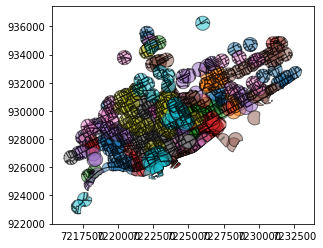

In [37]:
res_intersection.plot(alpha=0.5, edgecolor='k', cmap='tab10')

In [38]:
print(type(res_intersection))
#from shapely.ops import cascaded_union
res_intersection.head()
#stations_area = res_intersection.dissolve(by='CDNAME')
#np.shape(stations_area)
#boundary = geopandas.GeoSeries(cascaded_union(res_intersection))

<class 'geopandas.geodataframe.GeoDataFrame'>


,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,CTUID,CTNAME,ADAUID,MedianIncome,MedianIncomeQuintile,station_id,name,lat,lon,geometry
0,35201317,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,5350051.00,0051.00,35200292,36736.0,"(33621.0, 45184.0]",7247.0,Howard Park Ave / Dundas St W - SMART,43.6521,-79.4486,"POLYGON ((7219489.107 927028.157, 7219494.929 ..."
1,35201353,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,5350052.00,0052.00,35200301,56768.0,"(45184.0, 113408.0]",7247.0,Howard Park Ave / Dundas St W - SMART,43.6521,-79.4486,"POLYGON ((7219555.227 927025.941, 7219540.643 ..."
2,35201354,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,5350052.00,0052.00,35200301,47744.0,"(45184.0, 113408.0]",7247.0,Howard Park Ave / Dundas St W - SMART,43.6521,-79.4486,"POLYGON ((7219586.340 927077.600, 7219540.643 ..."
3,35201355,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,5350052.00,0052.00,35200301,32320.0,"(27840.0, 33621.0]",7247.0,Howard Park Ave / Dundas St W - SMART,43.6521,-79.4486,"POLYGON ((7219613.274 927209.089, 7219588.209 ..."
4,35201356,35,Ontario,3520,Toronto,CDR,3520005,Toronto,3520005,Toronto,...,5350052.00,0052.00,35200301,40640.0,"(33621.0, 45184.0]",7247.0,Howard Park Ave / Dundas St W - SMART,43.6521,-79.4486,"POLYGON ((7219536.626 927170.766, 7219492.574 ..."


In [39]:
toronto_DA_disjoint_gdf = toronto_DA_gdf[toronto_DA_gdf.intersects(res_difference)]
np.shape(toronto_DA_disjoint_gdf)

(2872, 25)

In [40]:
cond = toronto_DA_gdf['DAUID'].isin(toronto_DA_disjoint_gdf['DAUID'])
toronto_DA_gdf.drop(toronto_DA_gdf[cond].index, inplace = True)

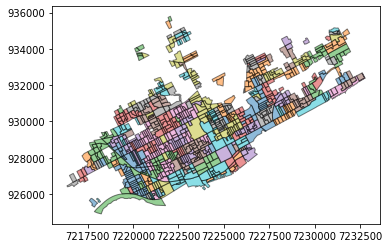

In [41]:
np.shape(toronto_DA_gdf)
toronto_DA_gdf.plot(alpha=0.5, edgecolor='k', cmap='tab10')

In [42]:
print(np.shape(toronto_DA_gdf))
toronto_DA_gdf['MedianIncomeQuintile'].value_counts(normalize=True) * 100
#toronto_DA_overlap_gdf = toronto_DA_gdf[toronto_DA_gdf.intersects(res_difference)]
#np.shape(toronto_DA_overlap_gdf)

(830, 25)


(33621.0, 45184.0]      27.216749
(45184.0, 113408.0]     24.753695
(27840.0, 33621.0]      20.566502
(11071.999, 23808.0]    16.009852
(23808.0, 27840.0]      11.453202
Name: MedianIncomeQuintile, dtype: float64